In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [7]:
data.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [9]:
print(data['play'].unique())

['no' 'yes']


In [50]:
from sklearn.preprocessing import LabelEncoder
for col in ['outlook', 'temp', 'humidity', 'windy', 'play']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    data
    print (data['outlook'], data['temp'], data['humidity'], data['windy'], data['play'])

0     2
1     2
2     0
3     1
4     1
5     1
6     0
7     2
8     2
9     1
10    2
11    0
12    0
13    1
Name: outlook, dtype: int64 0     1
1     1
2     1
3     2
4     0
5     0
6     0
7     2
8     0
9     2
10    2
11    2
12    1
13    2
Name: temp, dtype: int64 0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     0
8     1
9     1
10    1
11    0
12    1
13    0
Name: humidity, dtype: int64 0     0
1     1
2     0
3     0
4     0
5     1
6     1
7     0
8     0
9     0
10    1
11    1
12    0
13    1
Name: windy, dtype: int64 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64
0     2
1     2
2     0
3     1
4     1
5     1
6     0
7     2
8     2
9     1
10    2
11    0
12    0
13    1
Name: outlook, dtype: int64 0     1
1     1
2     1
3     2
4     0
5     0
6     0
7     2
8     0
9     2
10    2
11    2
12    1
13    2
Name: temp, dtype: int64 0     0
1     0
2     0
3     

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int64
 1   temp      14 non-null     int64
 2   humidity  14 non-null     int64
 3   windy     14 non-null     int64
 4   play      14 non-null     int64
dtypes: int64(5)
memory usage: 692.0 bytes


In [31]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [11]:
x = data.drop('play', axis = 1)
y = data['play']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [21]:
print (x_train)

     outlook  temp humidity  windy
13     rainy  mild     high   True
9      rainy  mild   normal  False
1      sunny   hot     high   True
7      sunny  mild     high  False
10     sunny  mild   normal   True
3      rainy  mild     high  False
0      sunny   hot     high  False
5      rainy  cool   normal   True
12  overcast   hot   normal  False


In [23]:
print (y_train)

13     no
9     yes
1      no
7      no
10    yes
3     yes
0      no
5      no
12    yes
Name: play, dtype: object


In [35]:
print (x_test)

     outlook  temp humidity  windy
8      sunny  cool   normal  False
6   overcast  cool   normal   True
4      rainy  cool   normal  False
11  overcast  mild     high   True
2   overcast   hot     high  False


In [37]:
print (y_test)

8     yes
6     yes
4     yes
11    yes
2     yes
Name: play, dtype: object


In [52]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()


x_train_encoded = encoder.fit_transform(x_train)

model_DT.fit(x_train_encoded, y_train)


DecisionTreeClassifier(max_depth=3)

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=3)
model_DT.fit(x_train_encoded, y_train)

DecisionTreeClassifier(max_depth=3)

In [58]:

data_uji = pd.DataFrame({'outlook': ['overcast'], 'temp': ['mild'], 'humidity': ['normal'], 'windy': [False]})


data_uji_encoded = encoder.transform(data_uji)


hasil_prediksi = model_DT.predict(data_uji_encoded)

print(hasil_prediksi)


['yes']


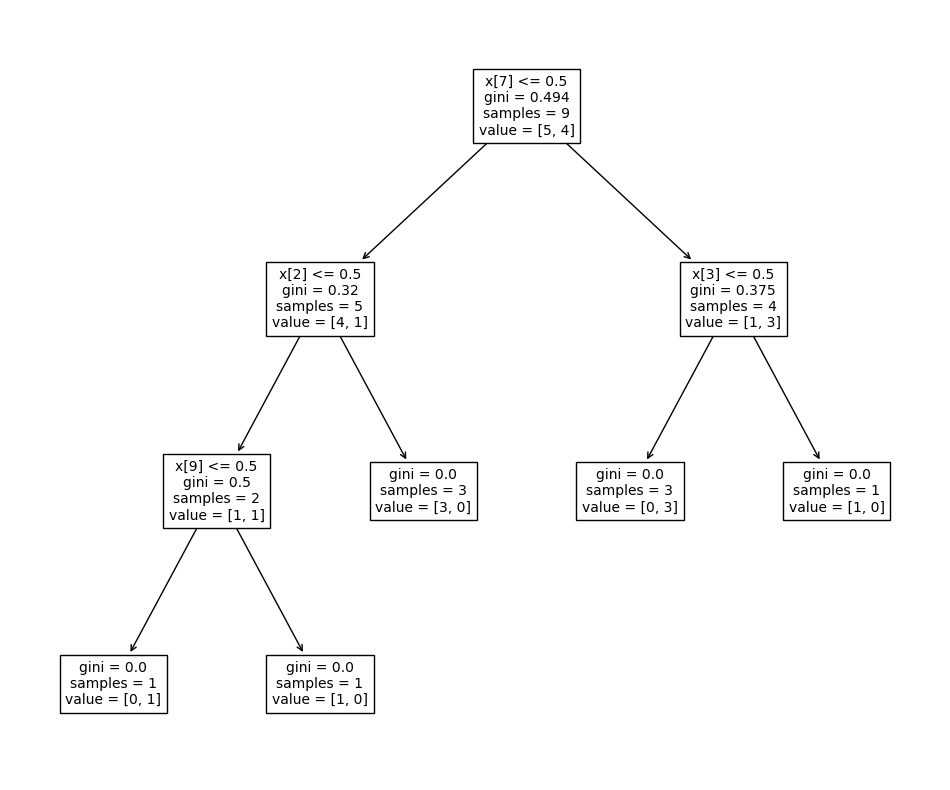

In [60]:
from sklearn.tree import plot_tree

plt.subplots(figsize=(12,10))
plot_tree (model_DT, fontsize = 10)
plt.show()

In [62]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = data.drop('Species', axis=1)
y = data['Species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)


hasil_prediksi = model_KNN.predict(X_test)

In [71]:
print(hasil_prediksi)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
